In [45]:
import sys

sys.path.insert(1, '/rds/general/user/le322/home/synthPy')



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches
import numpy as np
import pickle
from scipy import ndimage
import solver.rtm_solver as rtm
import utils.power_spectrum as util

import sys

sys.path.insert(1, '/rds/general/user/le322/home/synthPy')
import field_generator.gaussian3D as g3
import field_generator.gaussian2D as g2
import utils.power_spectrum as spectrum
import matplotlib.pyplot as plt
import numpy as np
import solver.minimal_solver as s







Eventually find the plots of electron distribution, seen in MPI_job

In [2]:
#insert here

Plot graphs - 0.1, 2.5, 5/3

In [114]:


sh2 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/2D_gen_0.1_2.5_73_testing_backup_shadow.pkl", "rb"))

sh = pickle.load(open("/rds/general/user/le322/home/synthPy/output/2D_gen_0.1_2.5_53_testing_backup_shadow.pkl", "rb"))




l_max = 2.5
l_min = 0.1
extent = 5
res = 1024//4

k_min = 2 * np.pi / l_max

k_max = 2 * np.pi / l_min


def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 5/3)

def k42(k):
    return power_spectrum(k, 7/3)

field_2d = g2.gaussian2D(k41)
xx,yy, ne = field_2d.domain_fft(l_max, l_min, extent, res)






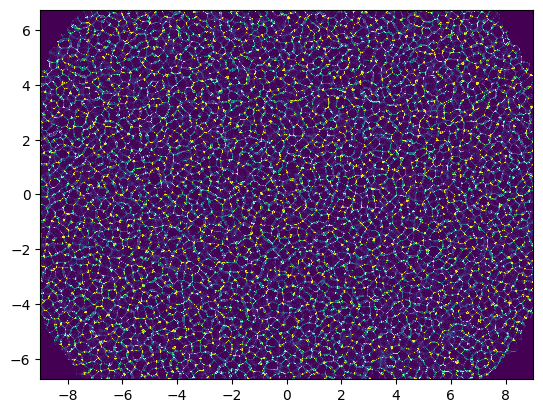

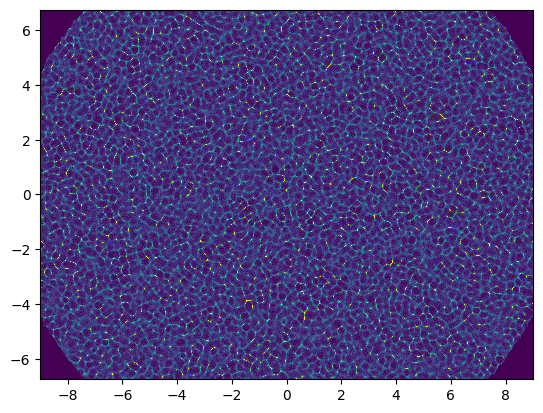

In [115]:
fig, ax = plt.subplots()
sh.plot(ax, clim = (0,50))
fig, ax = plt.subplots()
sh2.plot(ax, clim = (0,50))

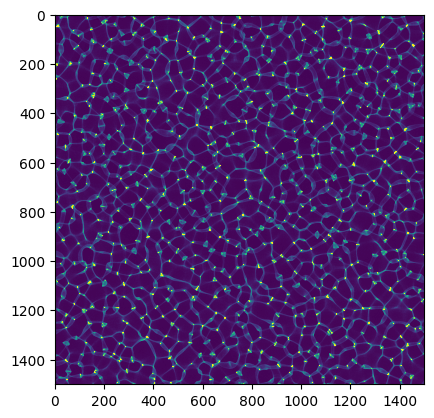

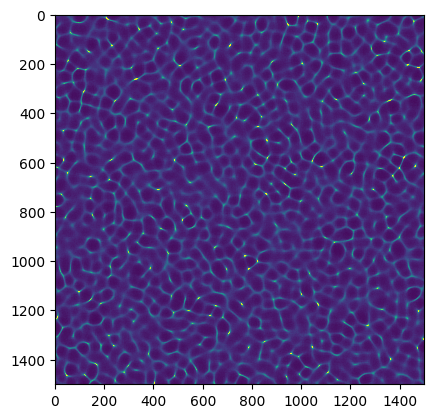

In [134]:
ne_53 = sh.H

ne_53 = ne_53[500:2001,500:2001 ] + 1

ne_53 = ne_53/np.max(ne_53)

plt.imshow(ne_53, clim = (0,0.1))
plt.show()

ne_73 = sh2.H

ne_73 = ne_73[500:2001,500:2001 ] + 1

ne_73 = ne_73/np.max(ne_73)

plt.imshow(ne_73, clim = (0,0.1))
plt.show()


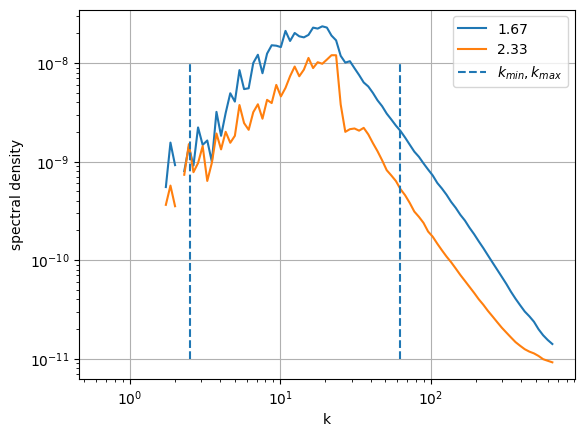

In [137]:


_, wn, ps = spectrum.radial_2Dspectrum(ne_53, 10,10)

_, wn2, ps2 = spectrum.radial_2Dspectrum(ne_73, 10,10)

l_max = 2.5

l_min = 0.1


plt.plot(wn, ps, label = '1.67')
plt.plot(wn2, ps2, label = '2.33')
# plt.plot(wn, 2*k42(wn))
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 1e-11, 1e-8, linestyle = 'dashed', label = '$k_{min}, k_{max}$')

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('k')
plt.ylabel('spectral density')
plt.show()

[[Model]]
    <lmfit.ExpressionModel('c*x + a')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 37
    # variables        = 2
    chi-square         = 0.06100627
    reduced chi-square = 0.00174304
    Akaike info crit   = -233.084773
    Bayesian info crit = -229.862937
    R-squared          = 0.99939111
[[Variables]]
    c: -2.18948592 +/- 0.00913506 (0.42%) (init = -1.666667)
    a:  3.02021818 +/- 0.04799642 (1.59%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, a) = -0.9897


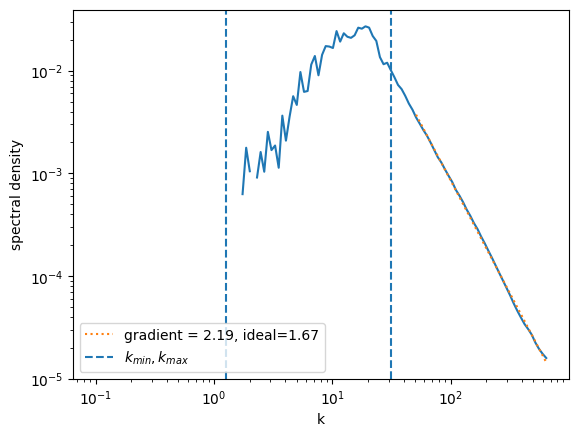

In [124]:

_, wn, ps = spectrum.radial_2Dspectrum(ne_53, 10,10)



plt.plot(wn, ps)
# plt.plot(wn, 2*k42(wn))
plt.grid()
plt.xscale('log')
plt.yscale('log')



l_min = 0.2

l_max = 5

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

min_i = np.where(wn > 50)[0][0]
max_i = np.where(wn < 1000)[0][-1]




from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
print(res0.fit_report())

plt.plot(wn[min_i: max_i + 1], np.exp(res0.best_fit), ':', label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(5/3, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 1e-5, 1e-1, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
# plt.text(10**1,1e35, f'$l_{{min}}$ = {l_min}', color = 'orange')
# plt.text(10**1,1e30, f'$l_{{max}}$ = {l_max}', color = 'orange')
# plt.text(10**1,1e26, f'power law = {np.round(5/3, 3)}', color = 'orange')
# plt.ylim(1e9,1e46)
# plt.xlim(1, 1e2)
plt.grid()
plt.legend()
# plt.savefig('/rds/general/user/le322/home/synthPy/output/2D_gen_spec_0.1_2.5_53.png', dpi = 400)
plt.show()